In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
# Dropout -> Prevent Overfitting 
from keras.models import Sequential
from keras.preprocessing import image

## Load Data

In [2]:
train_datagen = image.ImageDataGenerator(
    rescale= 1/255, horizontal_flip= True, zoom_range= 0.2 , shear_range= 0.2
)

train_data = train_datagen.flow_from_directory(directory="D:/DataSets/X ray/TB Data Set/TBX11K/imgs/train", target_size= (256,256), batch_size= 16,
                                               class_mode = 'binary'
                                               )

Found 8475 images belonging to 3 classes.


In [3]:
train_data.class_indices

{'ABNORMAL': 0, 'health': 1, 'tb': 2}

In [4]:
test_datagen = image.ImageDataGenerator(
    rescale= 1/255
)

test_data = test_datagen.flow_from_directory(directory="D:/DataSets/X ray/TB Data Set/TBX11K/imgs/test", target_size= (256,256), 
                                                batch_size= 16,
                                               class_mode = 'binary'
                                               )

Found 7173 images belonging to 3 classes.


## CNN Model

In [5]:
model = Sequential()

model.add(Conv2D(filters= 32, kernel_size=(3,3),activation='relu', input_shape = (256,256,3)))

model.add(Conv2D(filters= 64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters= 64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters= 128, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters= 128, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))
####
model.add(Conv2D(filters= 128, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters= 128, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))
#####
model.add(Flatten())
model.add(Dense(units = 64, activation= 'relu'))
model.add(Dropout(rate = 0.50))
model.add(Dense(units=1 , activation='sigmoid'))

model.compile(loss= keras.losses.binary_crossentropy, optimizer= "adam", metrics= ['acc'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [9]:
epochs=50 
history = model.fit_generator(train_data, steps_per_epoch=8, epochs= epochs, validation_steps= 4,
                   validation_data=test_data
                   )

C:\Users\ushan\AppData\Local\Temp/ipykernel_9112/3247099262.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data, steps_per_epoch=8, epochs= epochs, validation_steps= 4,


Epoch 1/50
8/8 [==============================] - 32s 4s/step - loss: -4813467.0000 - acc: 0.3828
Epoch 2/50
8/8 [==============================] - 36s 4s/step - loss: -51866392.0000 - acc: 0.3047
Epoch 3/50
8/8 [==============================] - 38s 5s/step - loss: -148404992.0000 - acc: 0.3359
Epoch 4/50
8/8 [==============================] - 35s 4s/step - loss: -1627774464.0000 - acc: 0.2656
Epoch 5/50
8/8 [==============================] - 34s 4s/step - loss: -8167277568.0000 - acc: 0.2812
Epoch 6/50
8/8 [==============================] - 34s 4s/step - loss: -17341308928.0000 - acc: 0.3438
Epoch 7/50
8/8 [==============================] - 35s 4s/step - loss: -57342087168.0000 - acc: 0.3125
Epoch 8/50
8/8 [==============================] - 37s 5s/step - loss: -103950843904.0000 - acc: 0.2578
Epoch 9/50
8/8 [==============================] - 33s 4s/step - loss: -533216034816.0000 - acc: 0.3516
Epoch 10/50
8/8 [==============================] - 33s 4s/step - loss: -1188732600320.0000 

KeyError: 'val_loss'

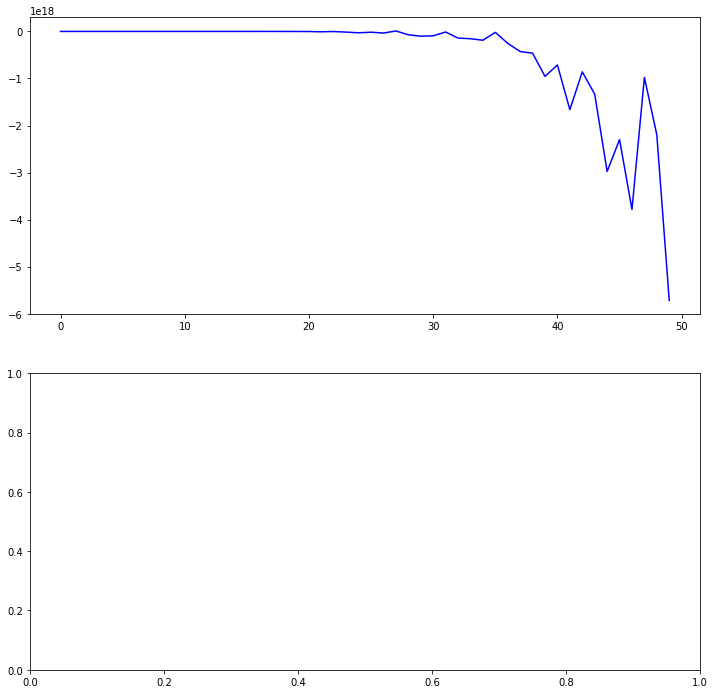

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()